## 1. 必要なライブラリーのインストール

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 2.学習用サンプルデータと正解データの作成

In [2]:
# x軸となるデータの作成
x=np.arange(100)
print(x)

# y軸となるデータの生成
# 平均xに標準偏差10の乱数を加える
# 乱数の出力ルールを統一する

np.random.seed(seed=1234)
y=np.random.normal(loc=x,scale=10)
print(y)

# 実際のyのデータ
y_true=x.copy()

print(y_true)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[  4.71435164 -10.90975695  16.32706968  -0.12651896  -3.20588733
  13.8716294   14.59588414   0.63476496   8.15696372 -13.42684954
  21.50035725  20.91946022  21.53324128  -7.2125482   10.65922634
  15.02118365  20.05453412  19.89091941  31.21158192   3.53094447
  17.97353675  14.44030656  23.93421376  28.53438911  37.18151554
  20.30694715  32.75554085   8.82972773  26.1689146   39.58969188
  26.02159772  34.37437654  42.47578573  43.45938256  42.63717292
  33.77908425  37.24712954  33.77205194  46.41674713  62.90960515
  40.76199588  35.3355407   42.36141937  22.25022399  46.477922
  36.02843216  44.63205167  47.18289191  55.55413982  51.15268581
  58.41008795  36.54189923  37.98026

## 3.グラフに可視化する

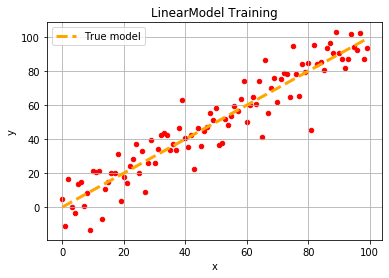

In [3]:
#最初に学習用データを可視化する
#次に正解の直線を可視化する。
plt.scatter(x,y,s=20, c='red', marker='o')
plt.plot(x,y_true,linestyle='--', linewidth=3, color='orange', label='True model')
plt.title("LinearModel Training")
plt.xlabel("x")
plt.ylabel("y")
plt.grid("True")
plt.legend()

## 4.二乗誤差計算用の適当な直線を作る

In [4]:
# y=w0*x+w1の形になるように係数を設定。
#係数はまずは乱数にする
# sizeは乱数の数を指定する引数
w=np.random.normal(loc=0,scale=1,size=2)
y_est=w[0]+x*w[1]
print("w0 = {:3f},w1 = {:3f}".format(w[0],w[1]))

w0 = 0.291205,w1 = 0.566534


## 5.一緒に可視化する

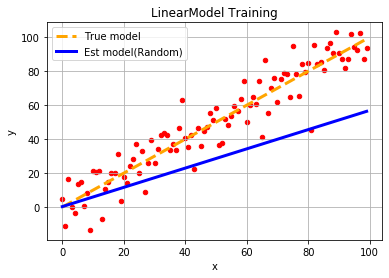

In [5]:
#最初に学習用データを可視化する
#次に正解の直線を可視化する。
plt.scatter(x,y,s=20, c='red', marker='o')
plt.plot(x,y_true,linestyle='--', linewidth=3, color='orange', label='True model')
plt.plot(x,y_est,linestyle='-', linewidth=3, color='blue', label='Est model(Random)')
plt.title("LinearModel Training")
plt.xlabel("x")
plt.ylabel("y")
plt.grid("True")
plt.legend()

## 6.二乗誤差を計算する

In [6]:
squared_error=0.5*np.sum((y_est-y_true)**2)
print("w0 = {:3f},w1 = {:3f}, 二乗誤差 = {:3f}".format(w[0],w[1],squared_error))

w0 = 0.291205,w1 = 0.566534, 二乗誤差 = 30226.752110


## 7.行列計算で重みを最適化する

In [7]:
#x行2列の行列を作り、1列目はすべて1、2列目はxの値にする
phi=np.ones((len(x),2))
phi[:,1]=x

#最適な重みを計算する
w_best=np.linalg.inv(phi.T @ phi) @ phi.T @ y

#最適化された重みで二乗誤差を計算する
y_best=w_best[0]+w_best[1]*x
squared_error_best=0.5*np.sum((y_best-y_true)**2)
print("w0 = {:3f},w1 = {:3f}, 二乗誤差 = {:3f}".format(w_best[0],w_best[1],squared_error_best))

w0 = 0.695597,w1 = 0.993041, 二乗誤差 = 8.182029


## 8.すべて可視化する

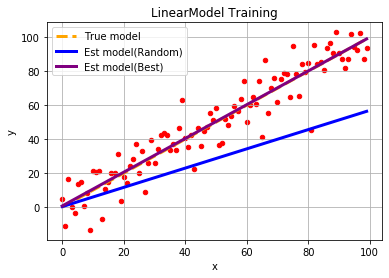

In [8]:
#最初に学習用データを可視化する
#次に正解の直線を可視化する。
#最後に最適化された直線も追加。
plt.scatter(x,y,s=20, c='red', marker='o')
plt.plot(x,y_true,linestyle='--', linewidth=3, color='orange', label='True model')
plt.plot(x,y_est,linestyle='-', linewidth=3, color='blue', label='Est model(Random)')
plt.plot(x,y_best,linestyle='-', linewidth=3, color='purple', label='Est model(Best)')
plt.title("LinearModel Training")
plt.xlabel("x")
plt.ylabel("y")
plt.grid("True")
plt.legend()

## 9.Sckit-Learnで線形回帰をしてみる

In [14]:
# 最適な重みをfitting
X = x.reshape(-1,1)
lr=LinearRegression()
lr.fit(X,y)

# 二乗誤差を計算
y_est_sklearn=lr.intercept_+lr.coef_[0]*x
squared_error_sklearn=0.5*np.sum((y_est_sklearn-y_true)**2)

print("w0_sklearn={0:3f},w1_sklearn={1:3f},二乗誤差={2:3f} ".format(lr.intercept_,lr.coef_[0],squared_error_sklearn))

w0_sklearn=0.695597,w1_sklearn=0.993041,二乗誤差=8.182029 


## 10.可視化する

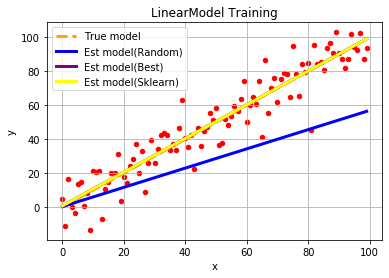

In [15]:
#最初に学習用データを可視化する
#次に正解の直線を可視化する。
#最後に最適化された直線も追加。
plt.scatter(x,y,s=20, c='red', marker='o')
plt.plot(x,y_true,linestyle='--', linewidth=3, color='orange', label='True model')
plt.plot(x,y_est,linestyle='-', linewidth=3, color='blue', label='Est model(Random)')
plt.plot(x,y_best,linestyle='-', linewidth=3, color='purple', label='Est model(Best)')
plt.plot(x,y_est_sklearn,linestyle='-', linewidth=3, color='yellow', label='Est model(Sklearn)')
plt.title("LinearModel Training")
plt.xlabel("x")
plt.ylabel("y")
plt.grid("True")
plt.legend()